In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load dataset
df = pd.read_csv("mxmh_survey_results.csv")


In [4]:
# Handle missing values
df.fillna(0, inplace=True)

# Ensure Age is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert genre frequencies to numeric values
genres = ['Classical', 'EDM', 'Hip hop', 'Rock', 'Pop']
mental_health_conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

df.rename(columns={
    'Frequency [Classical]': 'Classical',
    'Frequency [EDM]': 'EDM',
    'Frequency [Hip hop]': 'Hip hop',
    'Frequency [Rock]': 'Rock',
    'Frequency [Pop]': 'Pop'
}, inplace=True)

frequency_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Very frequently": 4
}

for genre in ['Classical', 'EDM', 'Hip hop', 'Rock', 'Pop']:
    df[genre] = df[genre].map(frequency_mapping).fillna(0)


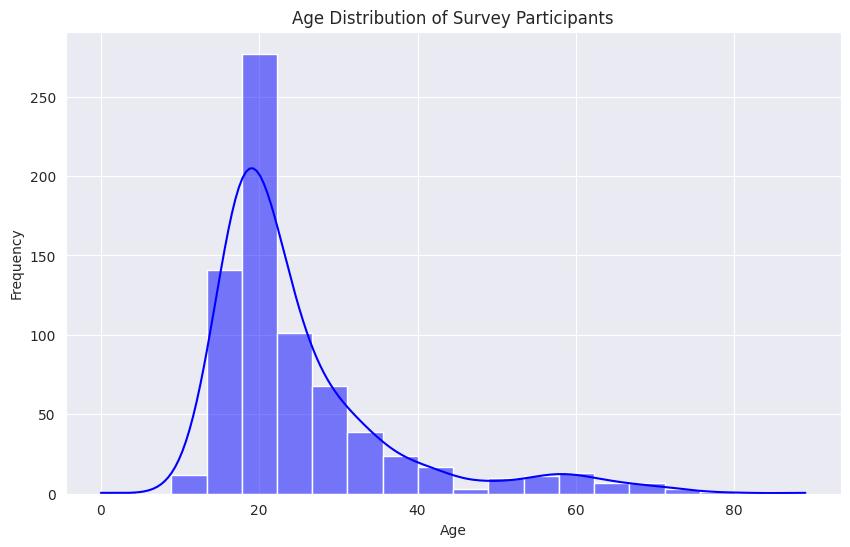

In [5]:

# Plot 1: Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution of Survey Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

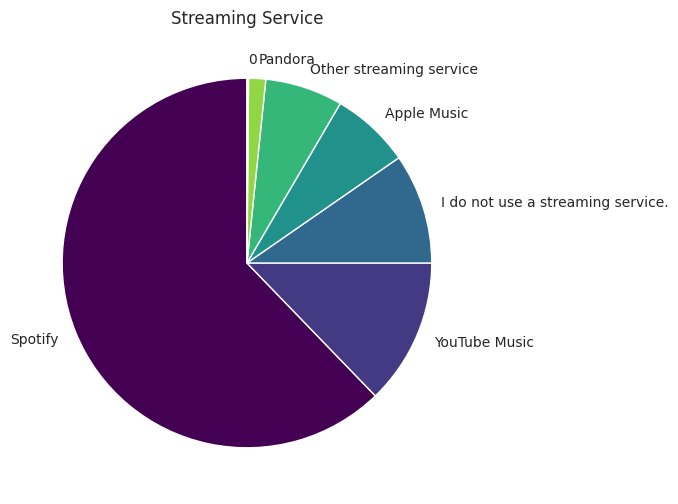

In [6]:

# Plot 2: Primary Streaming Service Usage
plt.figure(figsize=(10, 6))
df['Primary streaming service'].value_counts().plot(kind='pie',
    startangle=90,
    colormap='viridis')
plt.title('Streaming Service')
plt.ylabel('')
plt.show()

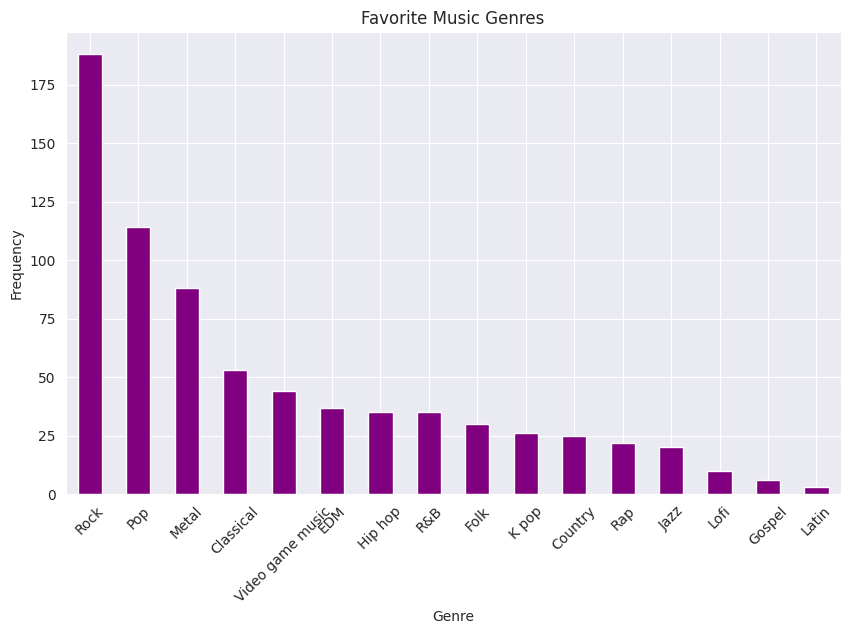

In [7]:

# Plot 3: Favorite Genre Distribution
plt.figure(figsize=(10, 6))
df['Fav genre'].value_counts().plot(kind='bar', color='purple')
plt.title('Favorite Music Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

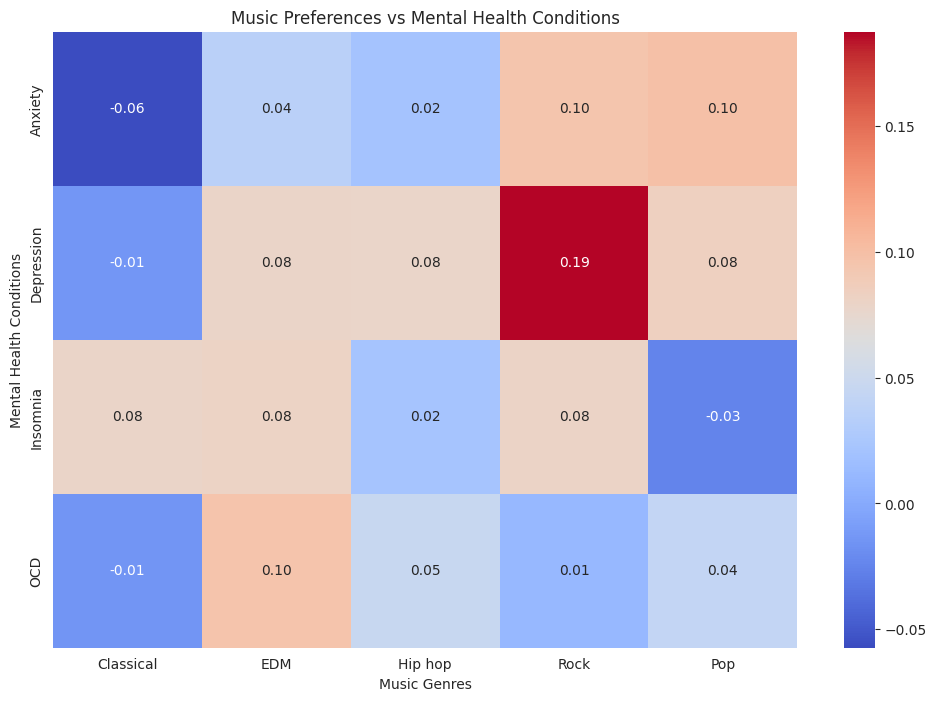

In [8]:

# Plot 4: Mental Health and Genre Preference Heatmap
plt.figure(figsize=(12, 8))
heatmap_data = df[mental_health_conditions + genres].corr().loc[mental_health_conditions, genres]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Music Preferences vs Mental Health Conditions')
plt.xlabel('Music Genres')
plt.ylabel('Mental Health Conditions')
plt.show()

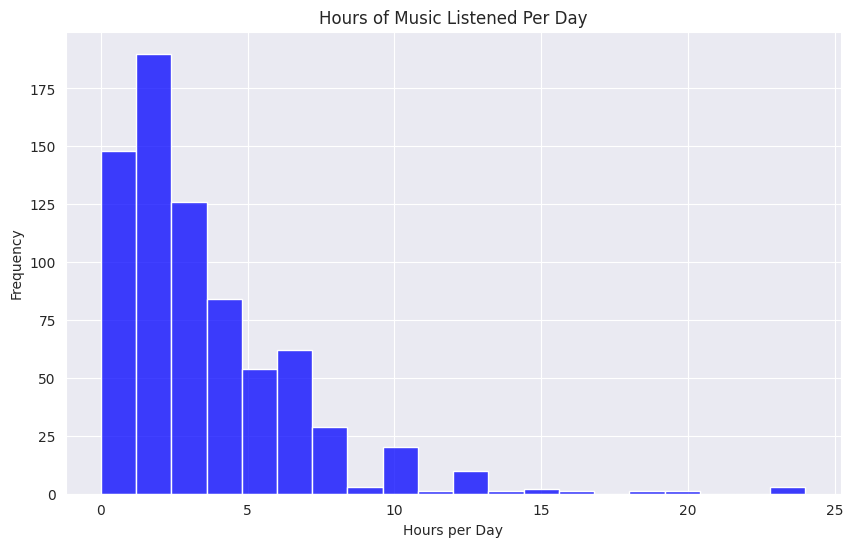

In [9]:

# Plot 5: Hours Listened
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours per day'], bins=20, color='blue')
plt.title('Hours of Music Listened Per Day')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

In [12]:
fig = px.scatter_3d(df, x='Insomnia', y='Anxiety', z='Depression', color='Age', color_continuous_scale="PRGn", template = 'plotly_white')
fig.update_traces(marker=dict(size=5))
fig.show()
